# FIFA.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import scipy
import scipy.integrate as integrate
import scipy.stats as st

# READ AND SHOW DATA

In [3]:
data = pd.read_csv("fifa.csv") 
data

Name  Age          Nationality
0                  L. Messi   31            Argentina
1         Cristiano Ronaldo   33             Portugal
2                 Neymar Jr   26               Brazil
3                    De Gea   27                Spain
4              K. De Bruyne   27              Belgium
5                 E. Hazard   27              Belgium
6                 L. Modrić   32              Croatia
7                 L. Suárez   31              Uruguay
8              Sergio Ramos   32                Spain
9                  J. Oblak   25             Slovenia
10           R. Lewandowski   29               Poland
11                 T. Kroos   28              Germany
12                 D. Godín   32              Uruguay
13              David Silva   32                Spain
14                 N. Kanté   27               France
15                P. Dybala   24            Argentina
16                  H. Kane   24              England
17             A. Griezmann   27               France
18            M. ter Stegen   26              Germany
19              T. Courtois   26              Belgium
20          Sergio Busquets   29                Spain
21                E. Cavani   31              Uruguay
22                 M. Neuer   32              Germany
23                S. Agüero   30            Argentina
24             G. Chiellini   33                Italy
25                K. Mbappé   19               France
26                 M. Salah   26                Egypt
27                 Casemiro   26               Brazil
28             J. Rodríguez   26             Colombia
29               L. Insigne   27                Italy
...                     ...  ...                  ...
18177             R. Roache   18  Republic of Ireland
18178          L. Wahlstedt   18               Sweden
18179           J. Williams   17              England
18180              M. Hurst   22             Scotland
18181              C. Maher   17  Republic of Ireland
18182               Y. Góez   18             Colombia
18183         K. Pilkington   44              England
18184             D. Horton   18              England
18185              E. Tweed   19  Republic of Ireland
18186          Zhang Yufeng   20             China PR
18187             C. Ehlich   19              Germany
18188            L. Collins   17                Wales
18189            A. Kaltner   18              Germany
18190            L. Watkins   18              England
18191  J. Norville-Williams   18              England
18192             S. Squire   18              England
18193            N. Fuentes   18                Chile
18194              J. Milli   18                Italy
18195            S. Griffin   18  Republic of Ireland
18196           K. Fujikawa   19                Japan
18197            D. Holland   18  Republic of Ireland
18198            J. Livesey   18              England
18199          M. Baldisimo   18               Canada
18200              J. Young   18             Scotland
18201              D. Walsh   18  Republic of Ireland
18202          J. Lundstram   19              England
18203    N. Christoffersson   19               Sweden
18204             B. Worman   16              England
18205        D. Walker-Rice   17              England
18206             G. Nugent   16              England

[18207 rows x 3 columns]

# 1. DATA VISUALIZATION

# 1. 1 Histogram

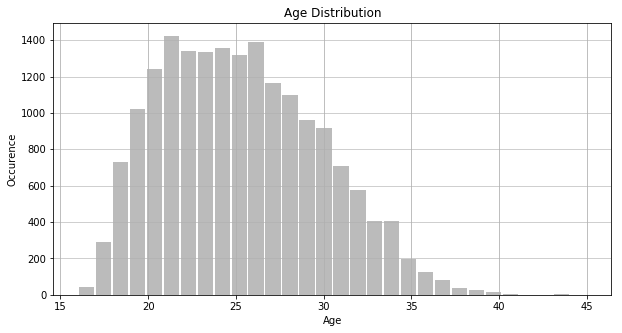

In [5]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
binInterval = 30 #from 45-16 = 29, let's have 30 as bin Interval

data['Age'].plot.hist(grid=True, bins=binInterval, rwidth=0.9,
                   color='#bbbbbb')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Occurence')
plt.grid(axis='y', alpha=0.75)


## 1. 2 Histrogram with Density

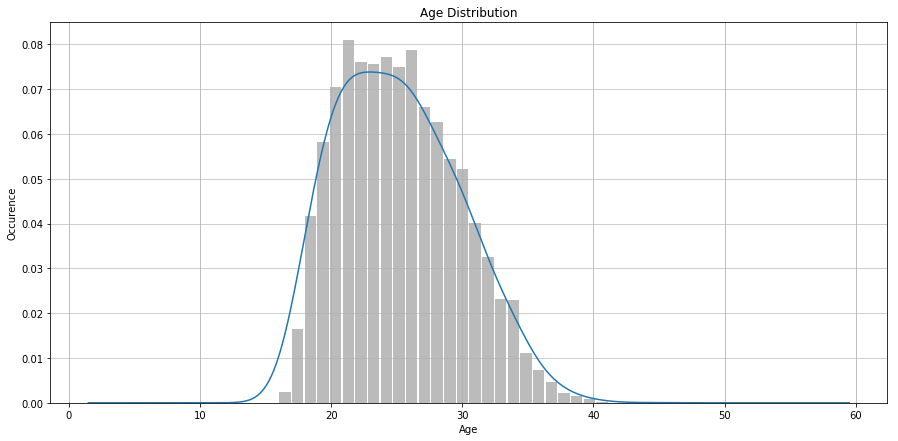

In [6]:
fig = plt.figure(figsize = (15,7))
ax = fig.gca()
data['Age'].plot.kde(bw_method = 0.3)
data['Age'].plot.hist(grid=True, bins=binInterval, rwidth=0.9, color='#bbbbbb', normed=True) # Histogram will now be normalized
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Occurence')
plt.grid(axis='y', alpha=0.75)

## 1. 3 Boxplot 

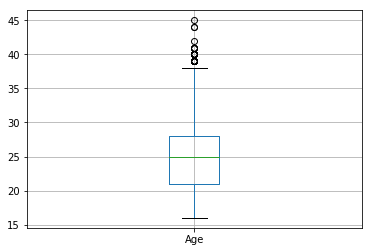

In [8]:
data.boxplot()

# 2. STATISTICAL DESCRIPTION

## 2.1 Minimum Value

In [9]:
minAge = data.min()
print(minAge)
print()

minAge = data['Age'].min()
print('From the information above, we can conclude that the minimum age of the player is ', minAge)

Name              A. Abang
Age                     16
Nationality    Afghanistan
dtype: object

From the information above, we can conclude that the minimum age of the player is  16


## 2.2 Maximum Value

In [10]:
maxAge = data.max()
print(maxAge)
print()

maxAge = data['Age'].max()
print('From the information above, we can conclude that the minimum age of the player is ', maxAge)


Name           Óscar Whalley
Age                       45
Nationality         Zimbabwe
dtype: object

From the information above, we can conclude that the minimum age of the player is  45


## 2.3 Mean

In [12]:
meanAge = data.mean()
print(meanAge)
print()

meanAge = data['Age'].mean()
print('The mean age of the player is ', meanAge)

Age    25.122206
dtype: float64

The mean age of the player is  25.122205745043114


## 2.4 Mode

In [13]:
modeAge = data.mode(numeric_only = True)
print(modeAge)
print() 

modeAge = data['Age'].mode()
print('Age Mode of the player is ', modeAge)


   Age
0   21

Age Mode of the player is  0    21
dtype: int64


## 2.5 Medium

In [14]:
medAge = data.median()
print (medAge)
print()

medAge = data['Age'].median()
print('Average Age of the player is ', medAge)

Age    25.0
dtype: float64

Average Age of the player is  25.0


## 2.6 Variance


In [15]:
stdAge = data.std()
print(stdAge)
print()

stdAge = data['Age'].std()
print('Standard deviation of the player is ', stdAge)

Age    4.669943
dtype: float64

Standard deviation of the player is  4.66994271341433


## 2.8 Skewness

In [16]:
skewAge = data.skew()
print(skewAge)
print()

skewAge = data['Age'].skew()
print('Skewness of the player is ', skewAge)

Age    0.391764
dtype: float64

Skewness of the player is  0.3917641387687474


## 2.9 Kurtosis

In [17]:
kurtAge = data.kurtosis()
print(kurtAge)
print()

kurtAge = data['Age'].kurtosis()
print("Kurtosis os the player is ", kurtAge)

Age   -0.459514
dtype: float64

Kurtosis os the player is  -0.4595135539307731


# 3. PROBABILITY DISTRIBUTION FUNCTION

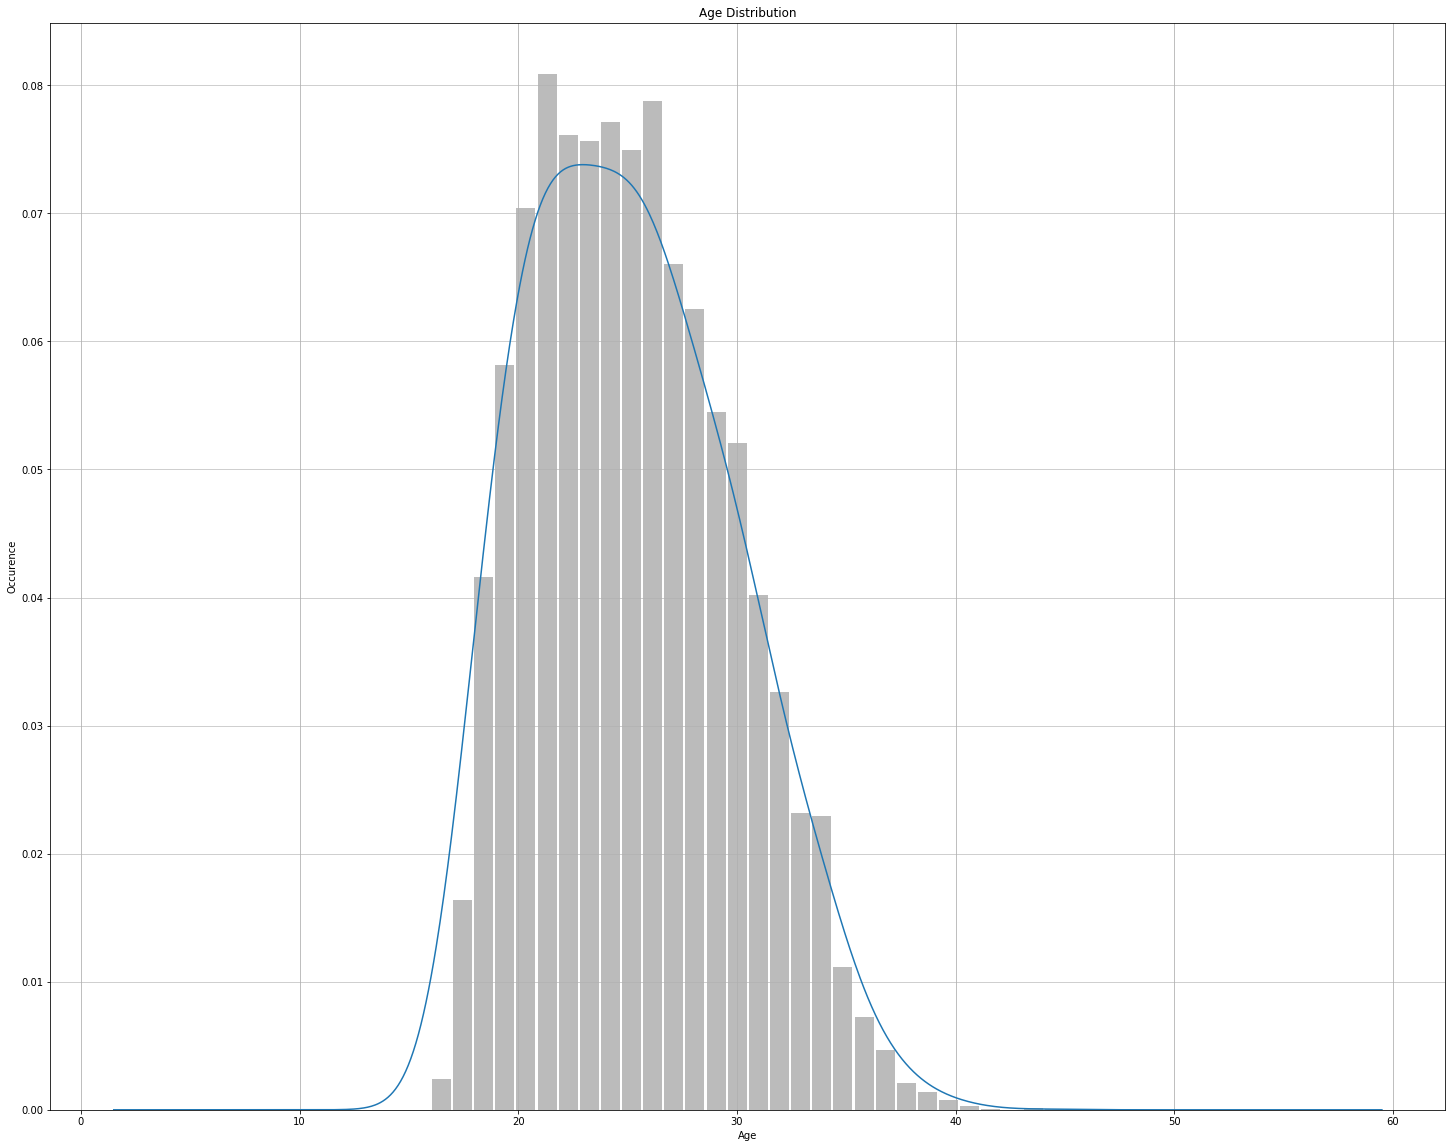

In [27]:
size = len(data)
x = scipy.arange(size)

fig = plt.figure(figsize = (25,20))
ax = fig.gca()

histogram = plt.hist(data["Age"], bins=30) #Plot histogram
dist_names = ['gamma', 'beta', 'norm', 'lognorm']
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(data['Age'])
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()

fig = plt.figure(figsize = (25,20))
ax = fig.gca()
data['Age'].plot.kde(bw_method = 0.3)
data['Age'].plot.hist(grid=True, bins=binInterval, rwidth=0.9, color='#bbbbbb', normed=True) # Histogram will now be normalized

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Occurence')
plt.grid(axis='y', alpha=0.75)


### BY VISUALIZATION, WE CAN SEE THAT BETA HAS THE CLOSEST DISTRIBUTION FUNCTION TO THE HISTOGRAM

## 3.2 By Kolmogorov Smirnov Test 

In [26]:
class Distribution(object):
    
    def __init__(self,dist_names_list = []):
        self.dist_names = ['lognorm', 'norm', 'gamma', 'beta']
        self.dist_results = []
        self.params = {}
        
        self.DistributionName = ""
        self.PValue = 0
        self.Param = None
        
        self.isFitted = False
        
        
    def Fit(self, y):
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names:
            dist = getattr(scipy.stats, dist_name)
            param = dist.fit(y)
            
            self.params[dist_name] = param
            #Applying the Kolmogorov-Smirnov test
            D, p = scipy.stats.kstest(y, dist_name, args=param);
            self.dist_results.append((dist_name,p))

        #select the best fitted distribution
        sel_dist,p = (max(self.dist_results,key=lambda item:item[1]))
        #store the name of the best fit and its p value
        self.DistributionName = sel_dist
        self.PValue = p
        
        self.isFitted = True
        return self.DistributionName,self.PValue,self.params[self.DistributionName]
    
    def Random(self, n = 1):
        if self.isFitted:
            dist_name = self.DistributionName
            param = self.params[dist_name]
            #initiate the scipy distribution
            dist = getattr(scipy.stats, dist_name)
            return dist.rvs(*param[:-2], loc=param[-2], scale=param[-1], size=n)
        else:
            raise ValueError('Must first run the Fit method.')


dst = Distribution()
func, P, parameter = dst.Fit(data['Age'])
print("Best fitted function: ", func)
print(func, " P: ", P)
print(func, "Parameter: ", parameter)

a,b,loc,scale = parameter

Best fitted function:  beta
beta  P:  7.05360508883961e-41
beta Parameter:  (2.485160112120321, 5.358773760119705, 15.649739615660838, 29.86087420987997)


### BY KOLMOGOROV TEST, WE TAKE BETA AS THE DISTRIBUTION FUNCTION 

# 4. QUESTIONS

## If there 1000 players will be added by Tsubasa, find expectation of:

## A. Have Age Less than 22 Years Old
## B. Have Age More than 40 Years Old

In [21]:
#Initialize beta
beta = st.beta(a,b,loc,scale)

#Function for solving question
def solveQuestion(X, func = beta):
    probability, error = integrate.quad(func.pdf, -np.inf, X)
    return probability, error

In [23]:
probability, error = solveQuestion(22)
print("Probability of player having age less than 22 is: {:.3f}".format(probability))
print("having error of : {:.10f}".format(error))

answer = round(probability * 1000)
print("answer = {}".format(answer))

Probability of player having age less than 22 is: 0.287
having error of : 0.0000000093
answer = 287


### ANSWER FOR A: 287

In [28]:
probability, error = solveQuestion(40)
probability = 1 - probability
print("Probability of player having age above 40 is : {:.3f}".format(probability))
print("with error of : {:.10f}".format(error))

answer = round(probability * 1000)
print("Answer = {}".format(answer))

Probability of player having age above 40 is : 0.001
with error of : 0.0000000064
Answer = 1


### ANSWER FOR B: 1